In [124]:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from statsmodels.graphics.tsaplots import plot_acf
    from statsmodels.graphics.tsaplots import plot_pacf
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.tsa.stattools import kpss
    import itertools
    import statsmodels.api as sm

In [32]:
df=pd.read_csv("sbi_data.csv")

In [33]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%
...,...,...,...,...,...,...,...
1380,"Jan 07, 2015",300.15,300.00,302.55,295.15,15.05M,0.08%
1381,"Jan 06, 2015",299.90,310.00,311.10,298.70,15.33M,-4.11%
1382,"Jan 05, 2015",312.75,316.25,316.80,312.10,9.14M,-0.79%
1383,"Jan 02, 2015",315.25,314.35,318.30,314.35,9.94M,0.40%


<AxesSubplot:>

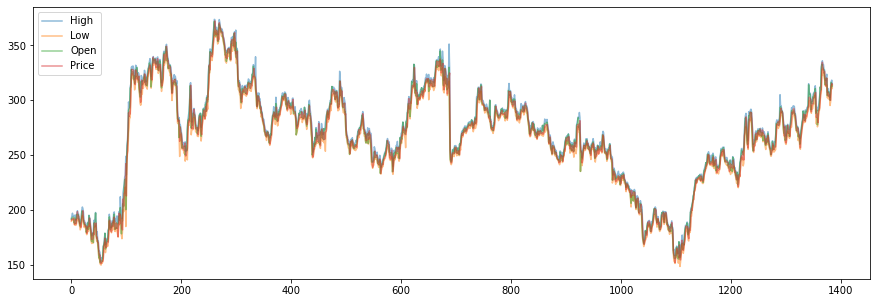

In [70]:
df[['High','Low','Vol.','Open','Price']].plot(figsize = (15, 5), alpha = 0.5)

# 1) As part of EDA, perform the following tasks:
         a. Print dimensions of the data
         b. Dimensions of Dataset
         c. Statistical Summary
         d. Converting Date
         e. Check Data Type and Missing Values
         f. Index the dataset with Date

In [5]:
df.shape

(1385, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


In [8]:
df.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [34]:
df1=df.iloc[:,:-5]

In [35]:
df1

,Date,Price
0,"Aug 07, 2020",190.65
1,"Aug 06, 2020",190.95
2,"Aug 05, 2020",191.45
3,"Aug 04, 2020",191.60
4,"Aug 03, 2020",192.25
...,...,...
1380,"Jan 07, 2015",300.15
1381,"Jan 06, 2015",299.90
1382,"Jan 05, 2015",312.75
1383,"Jan 02, 2015",315.25


In [36]:
df1.Date=pd.to_datetime(df1['Date'])

In [37]:
df1

,Date,Price
0,2020-08-07,190.65
1,2020-08-06,190.95
2,2020-08-05,191.45
3,2020-08-04,191.60
4,2020-08-03,192.25
...,...,...
1380,2015-01-07,300.15
1381,2015-01-06,299.90
1382,2015-01-05,312.75
1383,2015-01-02,315.25


In [38]:
df1['Date'].min()

Timestamp('2015-01-01 00:00:00')

In [39]:
df1['Date'].max()

Timestamp('2020-08-07 00:00:00')

In [41]:
df1.isnull().sum()

Date     0
Price    0
dtype: int64

In [45]:
df1.set_index('Date',inplace=True)                              # Indexing the dataset with Date

In [46]:
df1

,Price
Date,
2020-08-07,190.65
2020-08-06,190.95
2020-08-05,191.45
2020-08-04,191.60
2020-08-03,192.25
...,...
2015-01-07,300.15
2015-01-06,299.90
2015-01-05,312.75


In [48]:
df1.head()

,Price
Date,
2020-08-07,190.65
2020-08-06,190.95
2020-08-05,191.45
2020-08-04,191.60
2020-08-03,192.25


In [55]:
df2 = df1.groupby('Date')['Price'].sum().reset_index()
df2.set_index('Date',inplace=True)

In [56]:
df2

,Price
Date,
2015-01-01,314.00
2015-01-02,315.25
2015-01-05,312.75
2015-01-06,299.90
2015-01-07,300.15
...,...
2020-08-03,192.25
2020-08-04,191.60
2020-08-05,191.45


In [57]:
df2.head(10)

,Price
Date,
2015-01-01,314.00
2015-01-02,315.25
2015-01-05,312.75
2015-01-06,299.90
2015-01-07,300.15
2015-01-08,304.85
2015-01-09,303.20
2015-01-12,307.10
2015-01-13,305.10


# 2)Perform time series analysis:
     a. Visualize time series data
     b. Check Stationarity with:
           - ADF Test
           - KPSS Test

Text(0.5, 1.0, 'SBI STOCK_PRICE')

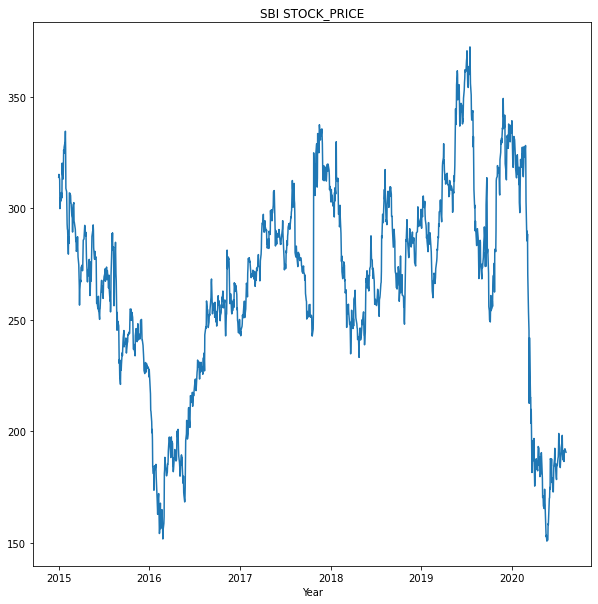

In [68]:
fig=plt.figure(figsize=(10,10))

plt.plot(df2)
plt.xlabel("Year")
plt.title("SBI STOCK_PRICE")

In [83]:
data = df2['Price'].resample('MS').mean()

In [84]:
data

Date
2015-01-01    314.902381
2015-02-01    296.115000
2015-03-01    281.002381
2015-04-01    279.800000
2015-05-01    277.922500
                 ...    
2020-04-01    185.833333
2020-05-01    162.755263
2020-06-01    180.377273
2020-07-01    189.928261
2020-08-01    191.380000
Freq: MS, Name: Price, Length: 68, dtype: float64

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

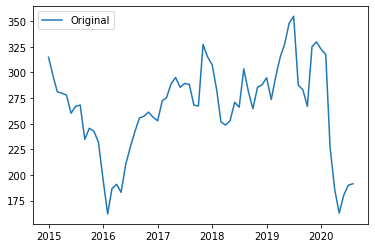

In [86]:
plt.plot(data, label = 'Original')
plt.legend(loc = 'best')


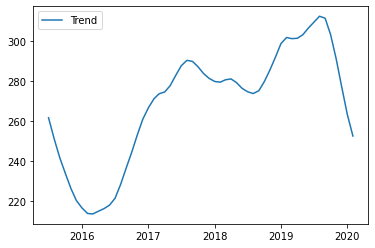

In [87]:
trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')


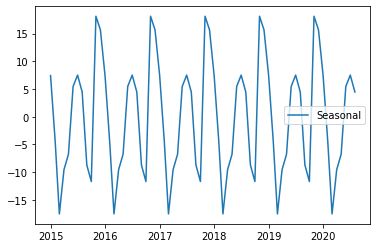

In [88]:
seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

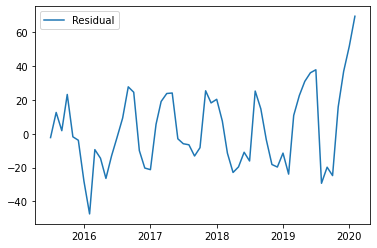

In [89]:

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [ ]:
Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, 
if there is, remove them.

# ACF AND PACF GRAPHS

In [90]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

<Figure size 720x720 with 0 Axes>

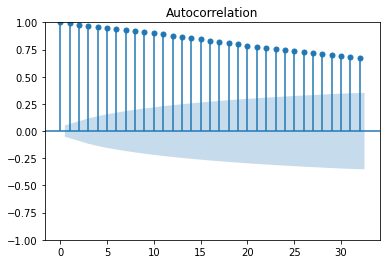

In [93]:
fig=plt.figure(figsize=(10,10))

plot_acf(df['Price'])
print()

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

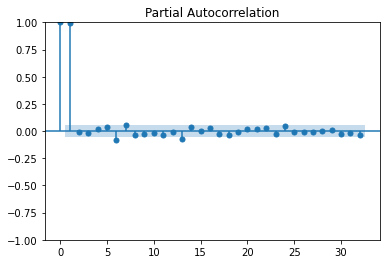

In [94]:
fig=plt.figure(figsize=(10,10))

plot_pacf(df['Price'])
print()

# AD FULLER TEST

In [95]:
from statsmodels.tsa.stattools import adfuller

In [100]:
result = adfuller(df2['Price'])


print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.305682
p-value: 0.170142
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


# KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

In [102]:
from statsmodels.tsa.stattools import kpss

In [103]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c',nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [104]:
kpss_test(data)

Results of KPSS Test:
Test Statistic            0.141737
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# Differencing to Remove Seasonality

In [105]:
data = data - data.shift(1)

<AxesSubplot:xlabel='Date'>

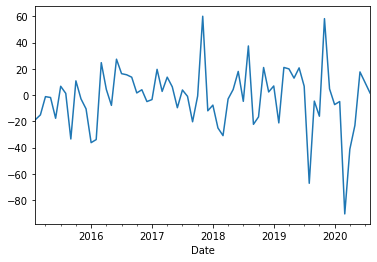

In [110]:
data.dropna(inplace=True)
data.plot()

# Decomposing
Decomposing the time series into three distinct components: trend, seasonality, and noise.

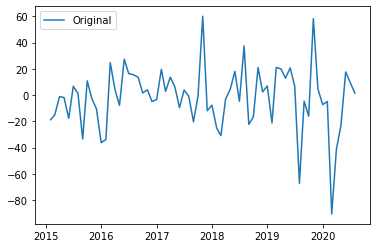

In [112]:
decomposition = seasonal_decompose(data)

plt.plot(data, label = 'Original')
plt.legend(loc = 'best')

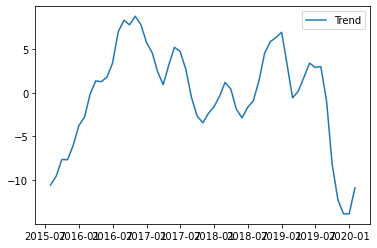

In [113]:
trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')


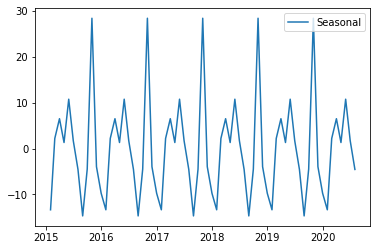

In [114]:
seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

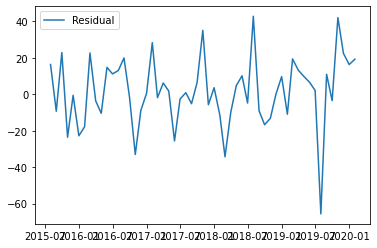

In [115]:
residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

# Time Series Forcasting using ARIMA

In [117]:
size = int(len(data) * 0.95)
train, test = data[0:size], data[size:len(data)]

In [118]:
test.head()

Date
2020-05-01   -23.078070
2020-06-01    17.622010
2020-07-01     9.550988
2020-08-01     1.451739
Freq: MS, Name: Price, dtype: float64

# Time Series Forcasting using ARIMA

In [ ]:
import itertools

In [123]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# MODEL BUILDING

In [128]:
from pylab import rcParams

order_list = []
param_seasonal_list = []
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            order_list.append(param)
            param_seasonal_list.append(param_seasonal)
            aic_list.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:573.0176020406125
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:468.41710772870255
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:496.60962219515466
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:366.5131642928736
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:477.6963736316133
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:468.05799304486413
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:369.7808848651426
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:358.7216491388087
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:565.3557946844717
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:460.3260011309367
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.60818870778326
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:360.57295689540945
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:479.19090969703285
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:460.83011729547866
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:371.6546921162482
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:352.1593103318157
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:597.0631111621734
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:485.17801772610204
AR

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:561.5126574038037
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:455.9825371856678
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:481.58960493833695
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:356.04300821932134
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:475.28887672516373
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:456.14067873513125
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:366.44947148440957
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:348.22413602786423
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:573.8736061094212
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:469.86843295060584
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:497.9412489343222
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:368.2314925069897
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:468.6654205108497
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:469.7144053280778
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:360.9707411926343
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:360.71806907315505
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:567.3551810624525
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:462.2743704164821
AR

In [125]:
import statsmodels.api as sm

In [129]:
min_val = aic_list.index(min(aic_list))
order = order_list[min_val]
seasonal_order = param_seasonal_list[min_val]

In [130]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0316      0.273     -0.116      0.908      -0.566       0.503
ma.L1         -1.0880      0.276     -3.938      0.000      -1.629      -0.547
ar.S.L12      -0.8214      0.163     -5.052      0.000      -1.140      -0.503
ma.S.L12      -0.2555      0.385     -0.664      0.506      -1.009       0.498
sigma2       597.7169    298.468      2.003      0.045      12.730    1182.704


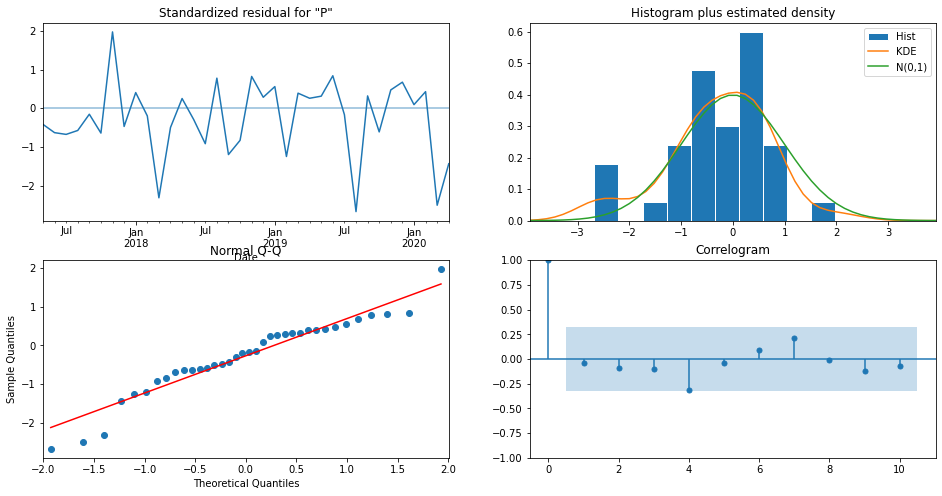

In [131]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating Forecasts

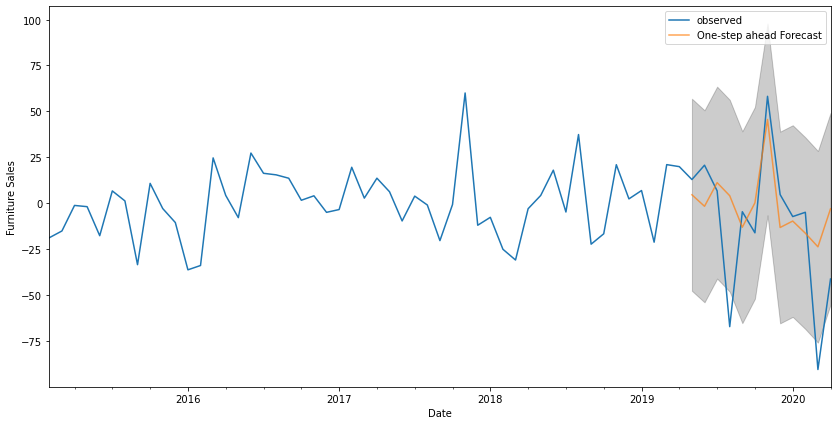

In [132]:
pred = results.get_prediction(start=pd.to_datetime('2019-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = train['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Calculating MSE and RMSE

In [133]:
y_forecasted = pred.predicted_mean
y_truth = train['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1045.96
The Root Mean Squared Error of our forecasts is 32.34


# Visualizing the Forecast

            lower Price  upper Price
2020-05-01   -55.018036    49.311715
2020-06-01   -47.230454    57.221850
2020-07-01   -62.081000    42.698401
2020-08-01   -23.834265    81.263333
2020-09-01   -81.230500    24.184581
2020-10-01   -72.028539    33.703064
2020-11-01   -35.257108    70.790073
2020-12-01   -61.661117    44.700709
2021-01-01   -56.604212    50.071170
2021-02-01   -81.904066    25.088672
2021-03-01   -42.843267    64.461334
2021-04-01   -41.622787    65.992774
2021-05-01   -49.286014    58.320963


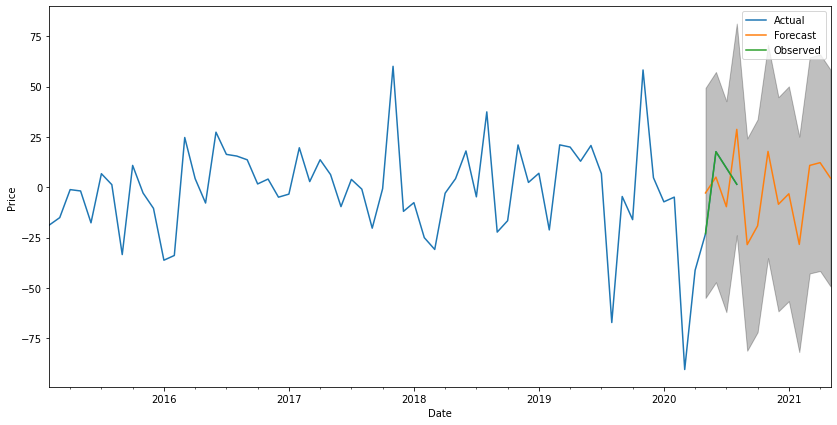

In [134]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
test.plot(label = "Observed")
print(pred_ci)
plt.legend(loc = "best")
plt.show()

# Comparing the predictions

In [135]:
Result = pd.DataFrame()
Result['Actual'] = test
Result['Predicted'] = pred_ci['upper Price']
Result

,Actual,Predicted
Date,,
2020-05-01,-23.078070,49.311715
2020-06-01,17.622010,57.221850
2020-07-01,9.550988,42.698401
2020-08-01,1.451739,81.263333


In [136]:
mse = ((Result['Actual'] - Result['Predicted']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 3569.27
The Root Mean Squared Error of our forecasts is 59.74


# CONCLUSION